# Conservation Laws and Heat Flow
### Lehner White

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import animation

### Problem 1:

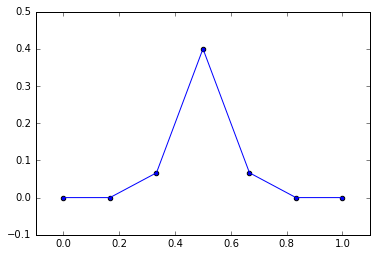

In [2]:
U0 = lambda x: 2. * np.maximum(.2 - abs(x - 0.5), 0)
x = np.linspace(0,1,7)

plt.plot(x, U0(x))
plt.scatter(x, U0(x))
plt.ylim(-.1,0.5)
plt.xlim(-0.1,1.1)
plt.show()

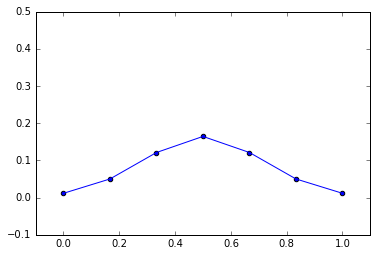

In [3]:
def Un(a, b, nx, nt, nu, U0, x):
    h = (float(b) - a) / float(nx)
    k = (float(b) - a) / nt
    lam = (nu * k) / (h**2)
    A = np.diag((1 - 2*lam) * np.ones(nx+1)) + np.diag(lam * np.ones(nx), k=-1) + np.diag(lam * np.ones(nx), k=1)
    return np.linalg.matrix_power(A, 4).dot(U0(x))
    
plt.plot(x, Un(0,1,6,10,0.05, U0, x))
plt.scatter(x, Un(0,1,6,10,0.05, U0, x))
plt.ylim(-.1,0.5)
plt.xlim(-0.1,1.1)
plt.show()

### Problem 2:

In [4]:
plt.switch_backend('Qt4Agg')

In [5]:
a, b, nx, nt, nu = -12, 12, 140, 70, 1
h = (float(b) - a) / (nx)
k = (1. - 0) / (nt)
lam = (nu * k) / (h**2)
A = np.diag((1 - 2*lam) * np.ones(nx+1)) + np.diag(lam * np.ones(nx), k=-1) + np.diag(lam * np.ones(nx), k=1)

In [6]:
def prob2_animation(res=140):
    x = np.linspace(-12, 12, res+1)
    y = np.maximum(1-x**2, 0)
    
    f = plt.figure()
    
    plt.axes(xlim=(-12,12), ylim=(-0.1,1.1))
    
    line, = plt.plot([], [])

    def animate(i):
        line.set_data(x, np.linalg.matrix_power(A,i).dot(y))
        return line,

    a = animation.FuncAnimation(f, animate, frames=y.size, interval=20)

    plt.show()
    
# Run the animation function we just defined.
prob2_animation()

In [7]:
a, b, nx, nt, nu = -12, 12, 140, 66, 1
h = (float(b) - a) / (nx)
k = (1. - 0) / (nt)
lam = (nu * k) / (h**2)
A = np.diag((1 - 2*lam) * np.ones(nx+1)) + np.diag(lam * np.ones(nx), k=-1) + np.diag(lam * np.ones(nx), k=1)

In [8]:
def prob2_animation(res=140):
    x = np.linspace(-12, 12, res+1)
    y = np.maximum(1-x**2, 0)
    
    f = plt.figure()
    plt.axes(xlim=(-12,12), ylim=(-0.1,1.1))
    
    line, = plt.plot([], [])
    
    def animate(i):
        line.set_data(x, np.linalg.matrix_power(A,i).dot(y))
        return line,
    
    a = animation.FuncAnimation(f, animate, frames=res+1, interval=20)
    
    plt.show()
    
prob2_animation()

### Problem 3:

/Users/Lehner/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Lehner/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


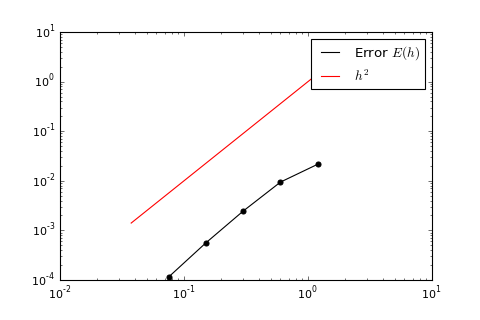

In [9]:
plt.switch_backend('NbAgg')

ax, bx, at, bt, nx, nt, nu = -12, 12, 0, 1, 640, 640, 1
h = (float(bx) - ax) / (nx)
k = (float(bt) - at) / (nt)
lam = (nu * k) / (h**2)
U0 = lambda x : np.maximum(1-x**2,0)
x = np.linspace(ax, bx, 640+1)
A = np.diag((1 - 2*lam) * np.ones(nx+1)) + np.diag(lam * np.ones(nx), k=-1) + np.diag(lam * np.ones(nx), k=1)
B = np.diag((1 + 2*lam) * np.ones(nx+1)) + np.diag(-lam * np.ones(nx), k=-1) + np.diag(-lam * np.ones(nx), k=1)
Bi = np.linalg.inv(B)
ex_sol = np.linalg.matrix_power(Bi.dot(A), 640).dot(U0(x))[::(640) / 20.]



steps = [20,40,80,160,320,640]
results = []
h_list = []
h2_list = []

for step in steps:
    ax, bx, at, bt, nx, nt, nu = -12, 12, 0, 1, step, step, 1
    h = (float(bx) - ax) / (nx)
    k = (float(bt) - at) / (nt)
    lam = (nu * k) / (h**2)
    U0 = lambda x : np.maximum(1-x**2,0)
    x = np.linspace(ax, bx, step+1)
    A = np.diag((1 - 2*lam) * np.ones(nx+1)) + np.diag(lam * np.ones(nx), k=-1) + np.diag(lam * np.ones(nx), k=1)
    B = np.diag((1 + 2*lam) * np.ones(nx+1)) + np.diag(-lam * np.ones(nx), k=-1) + np.diag(-lam * np.ones(nx), k=1)
    Bi = np.linalg.inv(B)
    U = np.linalg.matrix_power(Bi.dot(A), step).dot(U0(x))[::(step / 20.)]
    results.append(np.amax(np.abs(U-ex_sol)))
    h_list.append(24. / step)
    h2_list.append((24. / step)**2)

plt.loglog(h_list, results, label=r'Error $E(h)$', color='k')
plt.scatter(h_list, results, color='k')
plt.loglog(h_list, h2_list, label=r'$h^2$', color='r')
plt.legend()
plt.show()
    